<a href="https://colab.research.google.com/github/v0ltax/TT-2C2025-Data-Analitycs-Notebooks/blob/main/Robledo%20Sebastian%20-%20Comisi%C3%B3n%20252813%20-%20TPI%20Data%20Analytics/Pre-entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos con Pyhon - Pre-entrega
### Nombre y apellido: Sebastian Hernan Ariel Robledo

---
# Etapa 1

## Actividad 1

## Importar Datasets

In [ ]:
# Carga de datasets alojados en github
gitRepo = "https://raw.githubusercontent.com/v0ltax/TT-2C2025-Data-Analitycs-Notebooks"
urlClientes = gitRepo + "/refs/heads/main/Robledo%20Sebastian%20-%20Comisi%C3%B3n%20252813%20-%20TPI%20Data%20Analytics/clientes.csv"
urlMarketing = gitRepo + "/refs/heads/main/Robledo%20Sebastian%20-%20Comisi%C3%B3n%20252813%20-%20TPI%20Data%20Analytics/marketing.csv"
urlVentas = gitRepo + "/refs/heads/main/Robledo%20Sebastian%20-%20Comisi%C3%B3n%20252813%20-%20TPI%20Data%20Analytics/ventas.csv"

import pandas as pd

df_clientes = pd.read_csv(urlClientes)
df_marketing = pd.read_csv(urlMarketing)
df_ventas = pd.read_csv(urlVentas)

## Actividades 2 y 3

## Script básico

In [ ]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'Laptop', 'precio': 500.0, 'cantidad': 3},
  {'producto': 'Heladera', 'precio': 1000.0, 'cantidad': 5},
  {'producto': 'Smartphone', 'precio': 100.0, 'cantidad': 15}
]

In [ ]:
# Calculamos las ventas acumuladas - map
ventas_totales = sum(map(lambda x: x['precio'] * x['cantidad'], ventas))
ventas_totales

8000.0

In [ ]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

8000.0

## Actividad 4

## Dataframe ventas

### Análisis exploratorio de **datos**

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [ ]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [ ]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [ ]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
2052,397,Elementos de cerámica,$40.29,2.0,28/08/2024,Decoración
1156,1967,Horno eléctrico,$68.97,5.0,07/05/2024,Electrodomésticos
2387,2376,Laptop,$106.01,5.0,09/10/2024,Electrónica
2089,921,Lámpara de mesa,$82.78,4.0,01/09/2024,Decoración
2475,2472,Televisor,$67.41,1.0,22/10/2024,Electrónica


In [ ]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].describe()

,precio
count,3033
unique,2590
top,$76.32
freq,5


In [ ]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
2159,6.0
1120,9.0
3030,9.0
1950,6.0
1447,8.0


In [ ]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"]

,fecha_venta
0,02/01/2024
1,02/01/2024
2,02/01/2024
3,02/01/2024
4,02/01/2024
...,...
3030,30/12/2024
3031,30/12/2024
3032,30/12/2024
3033,30/12/2024


In [ ]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


## Actividad 5

### Calidad de datos

In [ ]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [ ]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="id_venta")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
878,204,Jarrón decorativo,$94.75,1.0,08/04/2024,Decoración
...,...,...,...,...,...,...
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
883,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
889,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica


In [ ]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [ ]:
# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [ ]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
df_ventas["producto"].value_counts()
# df_ventas["producto"].unique()


,count
producto,
Lámpara de mesa,181
Auriculares,147
Microondas,135
Cafetera,118
Laptop,104
Secadora,103
Jarrón decorativo,102
Smartphone,102
Alfombra,102


### Observaciones
* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [ ]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [ ]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [ ]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
31,3.22
18,4.66
70,4.16
73,6.84
9,4.42


In [ ]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
6,02/04/2024
30,26/06/2024
73,31/10/2024
83,23/11/2024
81,20/11/2024


In [ ]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
6,01/06/2024
8,10/05/2024
76,28/11/2024
63,14/10/2024
40,30/08/2024


### Calidad de los datos

In [ ]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

In [ ]:
# Buscamos registros nulos
df_marketing.isnull().sum()

,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


### Observaciones
* Cantidad de registros: 90
* Columnas: 6
* 0 duplicados
* 0 nulos
* Campo fecha_inicio: ajustar a dtype datetime
* Campo fecha_fin: ajustar a dtype datetime

## Dataframe clientes

### Analisis exploratorio de datos

In [ ]:
# Aplicamos info() para familiarizarnos con el dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [ ]:
# para ver los datos head y tail del dataframe
df_clientes

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
...,...,...,...,...,...
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14


### Calidad de los datos

In [ ]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [ ]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones
* Cantidad de registros: 567
* Columnas: 5
* 0 duplicados
* 0 nulos
* No requiere limpieza

---
# Etapa 2

## Actividad 1

## Limpieza de datos
Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [ ]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [ ]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [ ]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [ ]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [ ]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
2547,70.67
886,54.40
330,42.67


In [ ]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [ ]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [ ]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [ ]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [ ]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

### Dataframe marketing

* Cantidad de registros: 90
* Columnas: 6
* 0 duplicados
* 0 nulos
* Campo fecha_inicio: ajustar a dtype datetime
* Campo fecha_fin: ajustar a dtype datetime

In [ ]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [ ]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [ ]:
# Validamos los cambios
df_marketing.sample(5)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
89,11,Freidora eléctrica,RRSS,5.27,2024-12-29,2025-01-21
21,2,Lámpara de mesa,RRSS,5.88,2024-05-30,2024-06-29
11,43,Cortinas,Email,5.67,2024-05-02,2024-06-17
78,61,Cuadro decorativo,TV,5.30,2024-11-05,2024-12-23


## Actividad 2

## Transformación de datos
Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [ ]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [ ]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]

In [ ]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [ ]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [ ]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


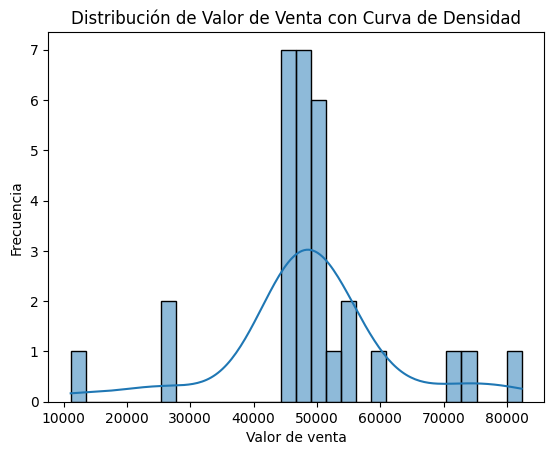

In [ ]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [ ]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Actividad 3

## Agregación
Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [ ]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [ ]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [ ]:
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [ ]:
# Ordenar y mostrar los resultados
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


## Actividad 4

## Integración de datos
Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [ ]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [ ]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")

In [ ]:
# Verificar coincidencias (muestra)
ventas_marketing.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,27/04/2024,04/06/2024
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,15/08/2024,12/09/2024
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,05/11/2024,23/12/2024
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,28/03/2024,20/04/2024
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,30/05/2024,29/06/2024


### Analizamos el impacto de la campaña

In [ ]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"


In [ ]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

,valor_venta,costo
categoria,,
Decoración,1437648.27,15774.86
Electrodomésticos,1515898.89,14644.65
Electrónica,1447733.40,14243.90


In [ ]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
